[dataset NY] https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

Utilizando o dataset do kaggle, cujo link está acima faz referência aso dados do ano de 2014, encontrei um novo link qe contém informacções mais atualizadas, de onde será retirado o conjunto de dados que será utilizado.

Após manipular os dados será gerado um novo arquivo csv, com informações mais objetivas e contendo novas features que vão ajudar o modelo de classificação de assaltos.


Link do site onde encontra-se o dataset(2020)

url:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

 - Link do site onde encontra-se o dataset
 
 url:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
# visualizando as 5 primeiras linhas do dataset
df[0:5]

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,222243929,12/25/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,40,0,25-44,M,BLACK,1007453,233952,40.808798,-73.916184,POINT (-73.91618413199996 40.80879780500004)
1,222115778,12/22/2020,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,33,0,18-24,M,BLACK HISPANIC,1001456,247485,40.845956,-73.937813,POINT (-73.93781267199995 40.84595574000008)
2,222090516,12/21/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,106,0,25-44,M,BLACK,1028605,187930,40.682398,-73.840079,POINT (-73.84007936899997 40.68239828900005)
3,221653577,12/10/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,103,0,18-24,M,BLACK,1039602,190480,40.689336,-73.800409,POINT (-73.80040882999998 40.68933550400004)
4,221599602,12/09/2020,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,S,120,0,18-24,M,BLACK,949767,170539,40.634708,-74.124241,POINT (-74.12424111699994 40.634707811000055)


## 2- Preparaçao dos dados


 - Removendo as colunas que nao serão utilizadas 

In [4]:
select_ny=df.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD','New Georeferenced Column'], axis=1)

In [5]:
#  Renomeando as colunas

select_ny.columns = ['data_da_ocorrencia','descricao_da_ofensa','nivel_da_ofensa','bairro'
                     ,'idade_do_infrator','sexo_do_infrator','raca_do_infrator','latitude','longitude']

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return weekday_dict[date_time_obj.weekday()]

date = select_ny['data_da_ocorrencia'].str.split("/", n = 3, expand = True)
select_ny['ano'] = date[2].astype('int32')
select_ny['dia'] = date[1].astype('int32')
select_ny['mes'] = date[0].astype('int32')
select_ny['dia_da_semana'] = select_ny['data_da_ocorrencia'].apply(date_to_weekday)

# alterando os dados da coluna nivel_da_ofensa

new_nivel_da_ofensa = {'M': "contravencao", 'F': "crime", 'V': "violacao",'I':"outro" }
select_ny['nivel_da_ofensa'] = select_ny['nivel_da_ofensa'].map(new_nivel_da_ofensa)

# alterando os dados da coluna bairro

new_bairro = {'B': 'Bronx', 'S': 'Staten_Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens' }
select_ny['bairro'] = select_ny['bairro'].map(new_bairro)

In [7]:
select_ny.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,12/25/2020,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday
1,12/22/2020,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday
2,12/21/2020,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday
3,12/10/2020,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday
4,12/09/2020,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday


In [8]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140413 entries, 0 to 140412
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   140413 non-null  object 
 1   descricao_da_ofensa  140376 non-null  object 
 2   nivel_da_ofensa      139024 non-null  object 
 3   bairro               140413 non-null  object 
 4   idade_do_infrator    140413 non-null  object 
 5   sexo_do_infrator     140413 non-null  object 
 6   raca_do_infrator     140413 non-null  object 
 7   latitude             140413 non-null  float64
 8   longitude            140413 non-null  float64
 9   ano                  140413 non-null  int32  
 10  dia                  140413 non-null  int32  
 11  mes                  140413 non-null  int32  
 12  dia_da_semana        140413 non-null  object 
dtypes: float64(2), int32(3), object(8)
memory usage: 12.3+ MB


In [9]:
select_ny.shape

(140413, 13)

 - Convertendo a coluna " DATA_DA_OCORRENCIA "para formato datetime

In [10]:
select_ny["data_da_ocorrencia"] = pd.to_datetime(select_ny["data_da_ocorrencia"] )

## 3- Criando novas features.

In [11]:
df = select_ny.copy()

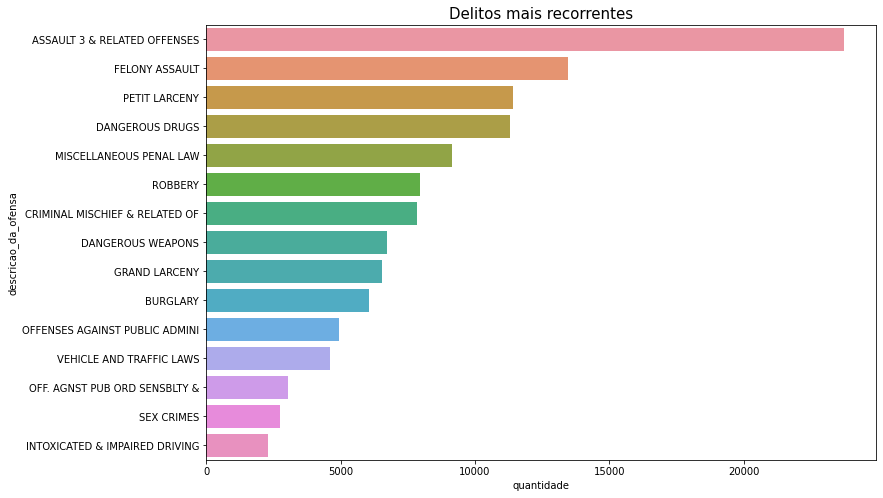

In [12]:
tipos_de_delitos = df.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']


f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'descricao_da_ofensa' , x = 'quantidade' , data = tipos_de_delitos.head(15))
titulo='Delitos mais recorrentes'
plt.title(titulo, fontsize=15)
plt.show()

De acordo com os dados acima visualizados, podemos criar um classificador que consiga distinguir delitos graves de delitos mais leves e que possa dizer a chance de ocorrer determinado delitoem algum local.

In [13]:
df.descricao_da_ofensa.value_counts().head(15)

ASSAULT 3 & RELATED OFFENSES      23731
FELONY ASSAULT                    13475
PETIT LARCENY                     11406
DANGEROUS DRUGS                   11289
MISCELLANEOUS PENAL LAW            9133
ROBBERY                            7948
CRIMINAL MISCHIEF & RELATED OF     7831
DANGEROUS WEAPONS                  6710
GRAND LARCENY                      6542
BURGLARY                           6056
OFFENSES AGAINST PUBLIC ADMINI     4925
VEHICLE AND TRAFFIC LAWS           4589
OFF. AGNST PUB ORD SENSBLTY &      3061
SEX CRIMES                         2730
INTOXICATED & IMPAIRED DRIVING     2299
Name: descricao_da_ofensa, dtype: int64

- Criando a coluna referente a crimes de roubo.

ASSAULT 3 & RELATED OFFENSES/ FELONY ASSAULT:
- agressão agravada ou agressão envolve circunstâncias que tornam o crime mais grave, como quando a vítima é ameaçada ou experimenta violência significativa que atinge substancialmente mais do que um tapa leve.

ROBBERY/BURGLARY:
- a ação de tomar bens ilegalmente de uma pessoa ou lugar pela força ou ameaça de força.

GRAND LARCENY

In [14]:
df['assalto'] = df['descricao_da_ofensa'].apply(lambda x: 1 if x=='FELONY ASSAULT' or x=='ASSAULT 3 & RELATED OFFENSES' or x =='ROBBERY' or x=='BURGLARY'  else 0)

In [15]:
df.assalto.value_counts()

0    89203
1    51210
Name: assalto, dtype: int64

In [16]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana,assalto
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday,1
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday,1
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday,1
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday,1
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday,0


- Criando a coluna final de semana.

In [17]:
df['fds'] = df['dia_da_semana'].apply(lambda x: 1 if x=='Sunday' or x =='Saturday' else 0)

In [18]:
df[df['fds']==1].dia_da_semana.value_counts()

Saturday    16611
Sunday      14774
Name: dia_da_semana, dtype: int64

- Criando um novo arquivo csv manipulado.

In [19]:
df.to_csv('dados_manipulados.csv', index =False , encoding = 'utf-8')

In [20]:
df_teste = pd.read_csv('dados_manipulados.csv')

In [21]:
df_teste.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana,assalto,fds
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday,1,0
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday,1,0
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday,1,0
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday,1,0
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday,0,0


In [22]:
df.shape

(140413, 15)

In [23]:
df_teste.shape

(140413, 15)